# Fine Tuning GPT-2 for NPC Dialogue

### My first time fine tuning a LLM. Training on Google Colab for GPU acceleration.

## Installations used for fine tuning

In [ ]:
%pip install -U transformers
%pip install -U datasets
%pip install -U accelerate
%pip install -U peft
%pip install -U trl
%pip install -U bitsandbytes
%pip install -U wandb

### Done in Colab but not going to upload onto this Jupyter

I added a `kaggle.json` file with my Kaggle API key to download the dataset 

In [1]:
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: kaggle.json: No such file or directory


## Dataset used:
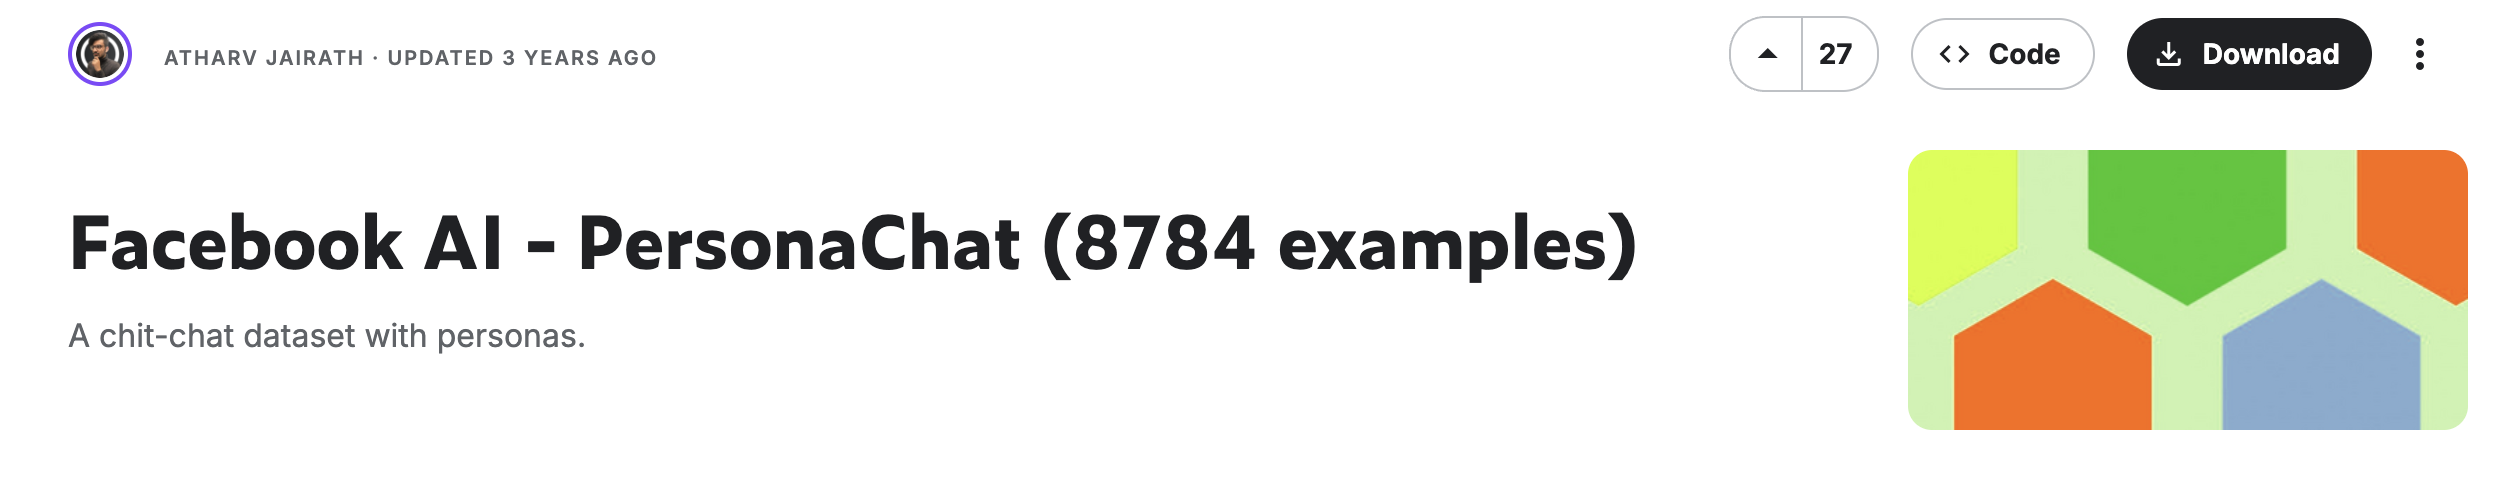




In [ ]:
import kagglehub

path = kagglehub.dataset_download("atharvjairath/personachat")

print("Path to dataset files:", path)

### Output: 
Path to dataset files: /kaggle/input/personachat

## Data Cleaning

In [ ]:
import pandas as pd

csv_path = "/kaggle/input/personachat/personality.csv"
df = pd.read_csv(csv_path)

print(df.head())
print(df.columns)

### Output:
   Unnamed: 0                                            Persona  \
0           0   i like to remodel homes. i like to go hunting...   
1           1   my mom is my best friend. i have four sisters...   
2           2   i had a gig at local theater last night. i wo...   
3           3   i am very athletic. i wear contacts. i have b...   
4           4   i am primarily a meat eater. i am a guitar pl...   

                                                chat  
0  hi , how are you doing ? i am getting ready to...  
1  hi , how are you doing today ?\ni am spending ...  
2  we all live in a yellow submarine , a yellow s...  
3  hi ! i work as a gourmet cook .\ni do not like...  
4  how are you doing today\nwhat do you do for ca...  
Index(['Unnamed: 0', 'Persona', 'chat'], dtype='object')

In [ ]:
dialogues_with_persona = []

for persona, chat_text in zip(df['Persona'], df['chat']):
    lines = chat_text.split('\n')
    formatted_lines = [f"<|npc_persona|> {persona.strip()}"]
    for i, line in enumerate(lines):
        speaker = "<|player|>" if i % 2 == 0 else "<|npc|>" # even lines are player speaking
        formatted_lines.append(f"{speaker} {line.strip()}")
    dialogues_with_persona.append("\n".join(formatted_lines))